## Import Library`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## load dataset

In [2]:
# Load the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv("datasets/housing.csv")

# Display the first 5 rows of the DataFrame to get an overview of the data
df.head(5)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [5]:
# Calculate the total number of missing values in the entire DataFrame
df.isnull().sum().sum()


np.int64(0)

In [6]:
# Count the occurrences of each unique value in the 'furnishingstatus' column
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [7]:
# Convert 'price' from its original unit to millions of currency units
df["price"] = df["price"] / 1000000

# Convert 'area' from its original unit to thousands of square meters (or other unit)
df['area'] = df["area"] / 1000

# Calculate the price per area (in millions per 1000 square units), and round the result
df["price/area"] = (df['price'] / df['area']).round()


In [8]:
# Calculate the price per area (in millions per square unit) without rounding the result
df["price/area"] = df['price'] / df['area']


In [9]:
# Create a set of categorical columns by excluding 'price', 'area', and 'price/area' from the DataFrame's columns
categorical_columns = set(df.columns) - {'price', 'area', "price/area"}

# Convert each column in the categorical_columns set to the 'category' data type
for col in categorical_columns:
    df[col] = df[col].astype("category")

# Display the data types of all columns in the DataFrame
df.dtypes


price                float64
area                 float64
bedrooms            category
bathrooms           category
stories             category
mainroad            category
guestroom           category
basement            category
hotwaterheating     category
airconditioning     category
parking             category
prefarea            category
furnishingstatus    category
price/area           float64
dtype: object

In [10]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price/area
0,13.30,7.42,4,2,3,yes,no,no,no,yes,2,yes,furnished,1.792453
1,12.25,8.96,4,4,4,yes,no,no,no,yes,3,no,furnished,1.367187


---

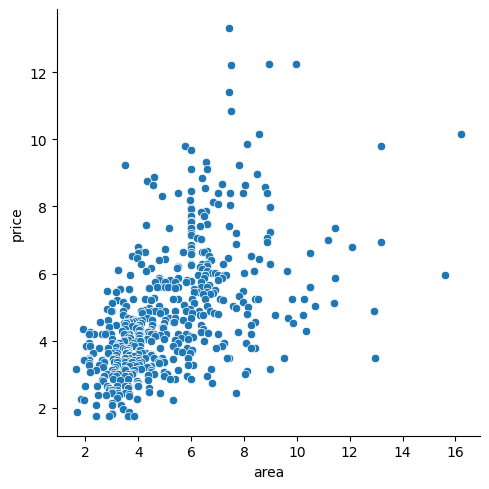

In [11]:
# Create a scatter plot with 'area' on the x-axis and 'price' on the y-axis
sns.relplot(
    data=df,         # The dataset to use for the plot
    x='area',        # The variable to plot on the x-axis (area)
    y='price',       # The variable to plot on the y-axis (price)
    kind="scatter",  # Type of plot, here we use a scatter plot
)


<Axes: xlabel='area', ylabel='price'>

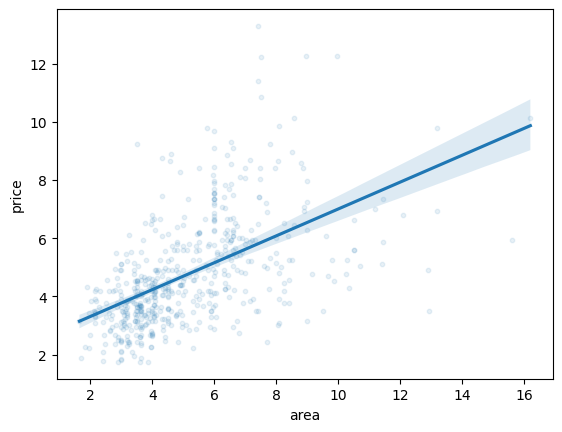

In [12]:
# Create a scatter plot with a regression line, showing the relationship between 'area' and 'price'
sns.regplot(
    data=df,                      # The dataset to use for the plot
    x='area',                     # The variable to plot on the x-axis (area)
    y='price',                    # The variable to plot on the y-axis (price)
    scatter_kws={'alpha': 0.1, 's': 10},  # Customize the appearance of the scatter points
)


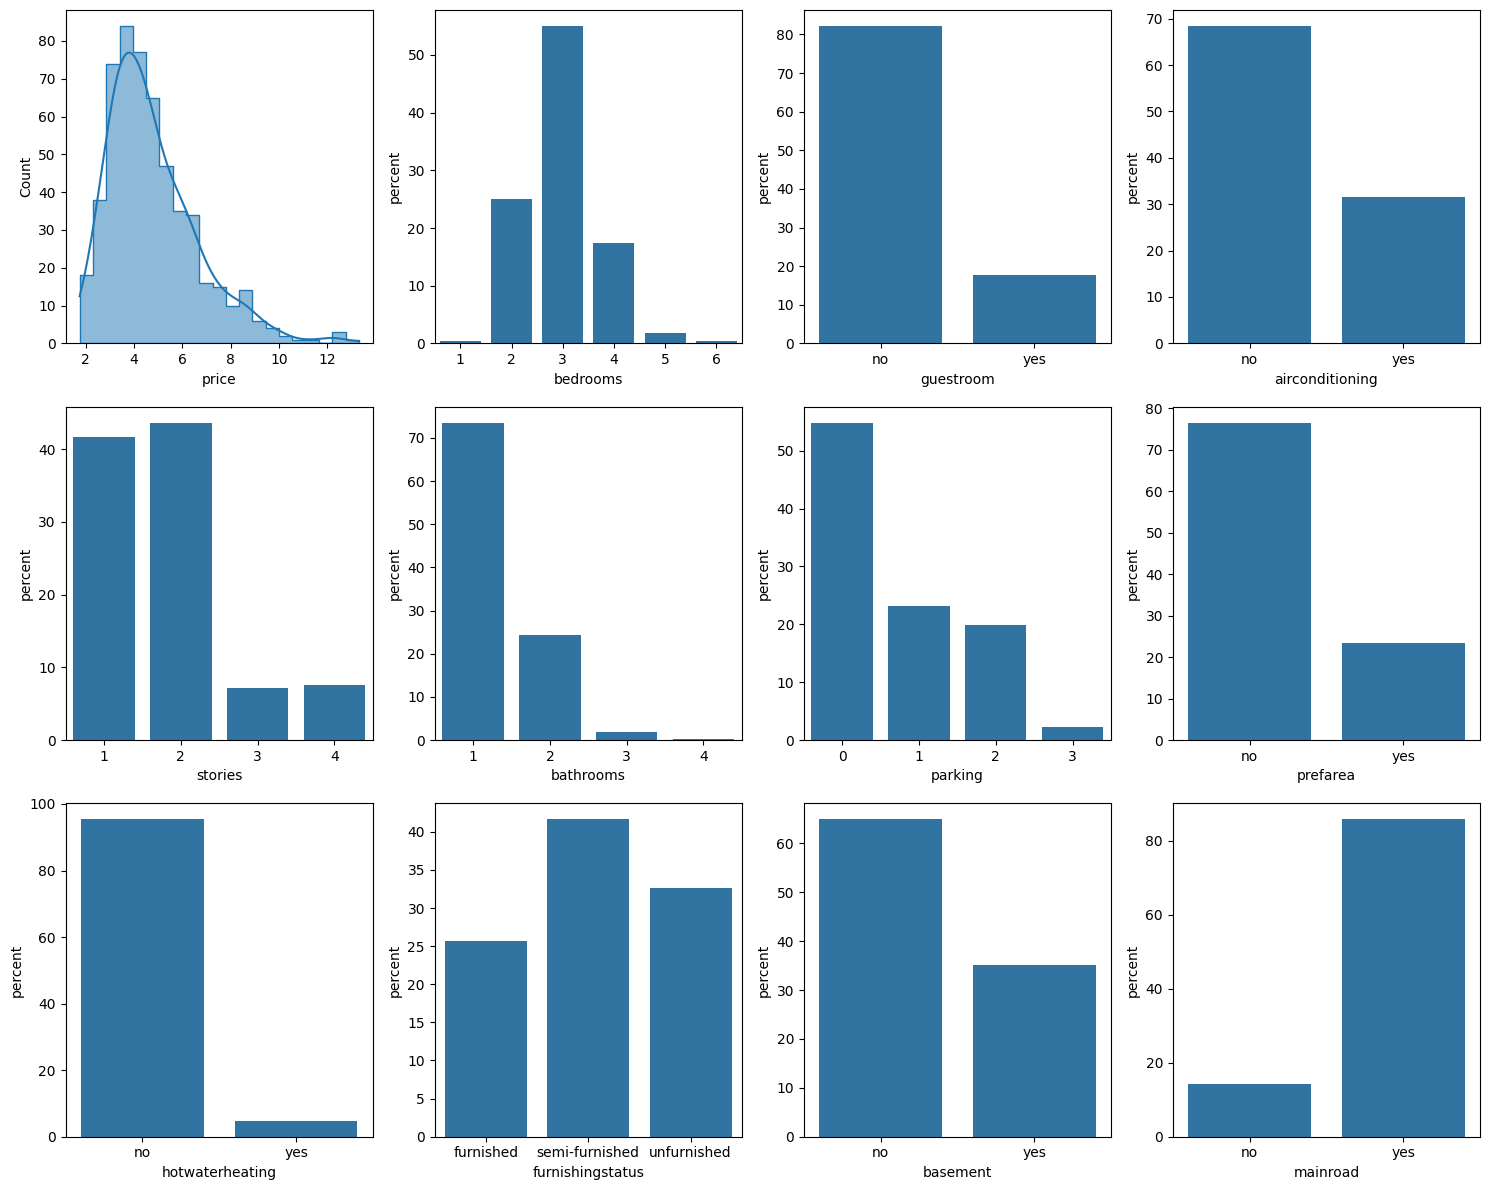

In [13]:
# Create a 3x4 grid of subplots with specified figure size
fig, axes = plt.subplots(3, 4, figsize=(15, 12))

# Plot a histogram of 'price' with step lines and a KDE (Kernel Density Estimate) on the first subplot
sns.histplot(df, x="price", ax=axes[0,0], element="step", kde=True)

# Loop through the categorical columns and plot countplots on the remaining axes (axes[1:] for categorical features)
for ax, col in zip(axes.flat[1:], categorical_columns):
    sns.countplot(df, x=col, ax=ax, stat="percent")

# Adjust the layout so the plots do not overlap
plt.tight_layout()


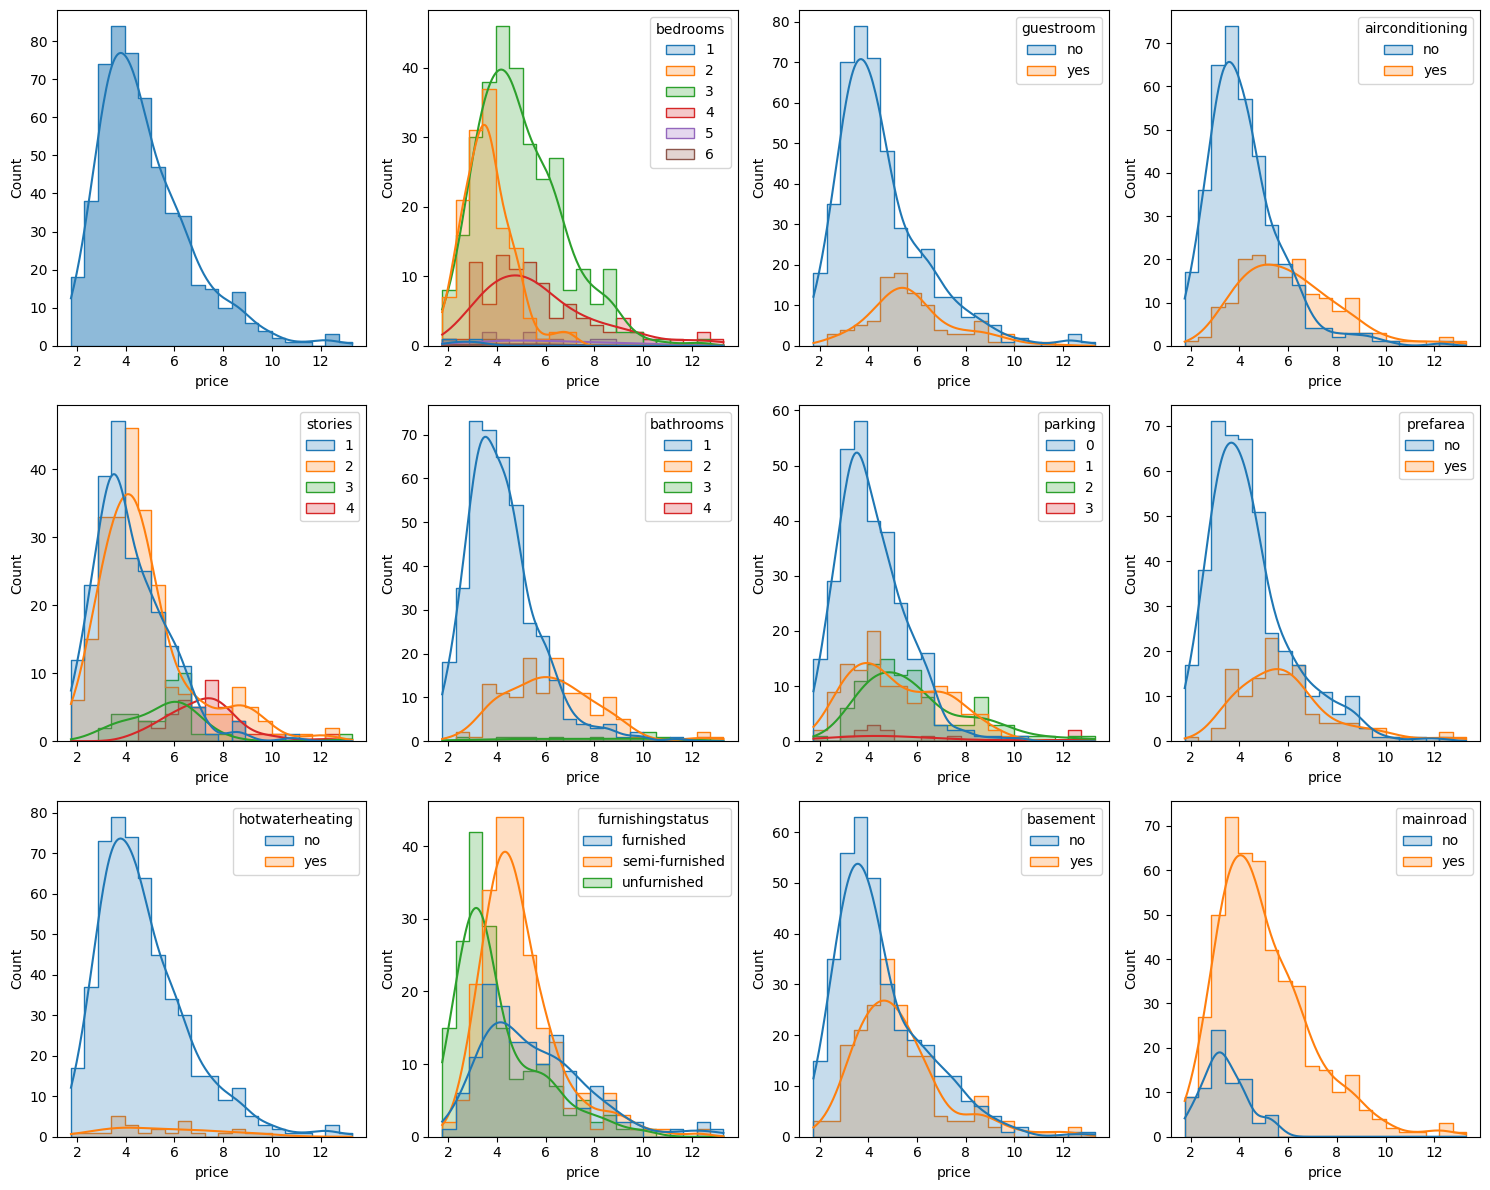

In [14]:
# Create a 3x4 grid of subplots with specified figure size
fig, axes = plt.subplots(3, 4, figsize=(15, 12))

# Plot a histogram of 'price' with step lines and a KDE (Kernel Density Estimate) on the first subplot
sns.histplot(df, x="price", ax=axes[0, 0], element="step", kde=True)

# Loop through the categorical columns and plot histograms with the hue for each categorical column
for ax, col in zip(axes.flat[1:], categorical_columns):
    sns.histplot(df, hue=col, x="price", ax=ax, fill=True, element="step", kde=True)

# Adjust the layout so the plots do not overlap
plt.tight_layout()


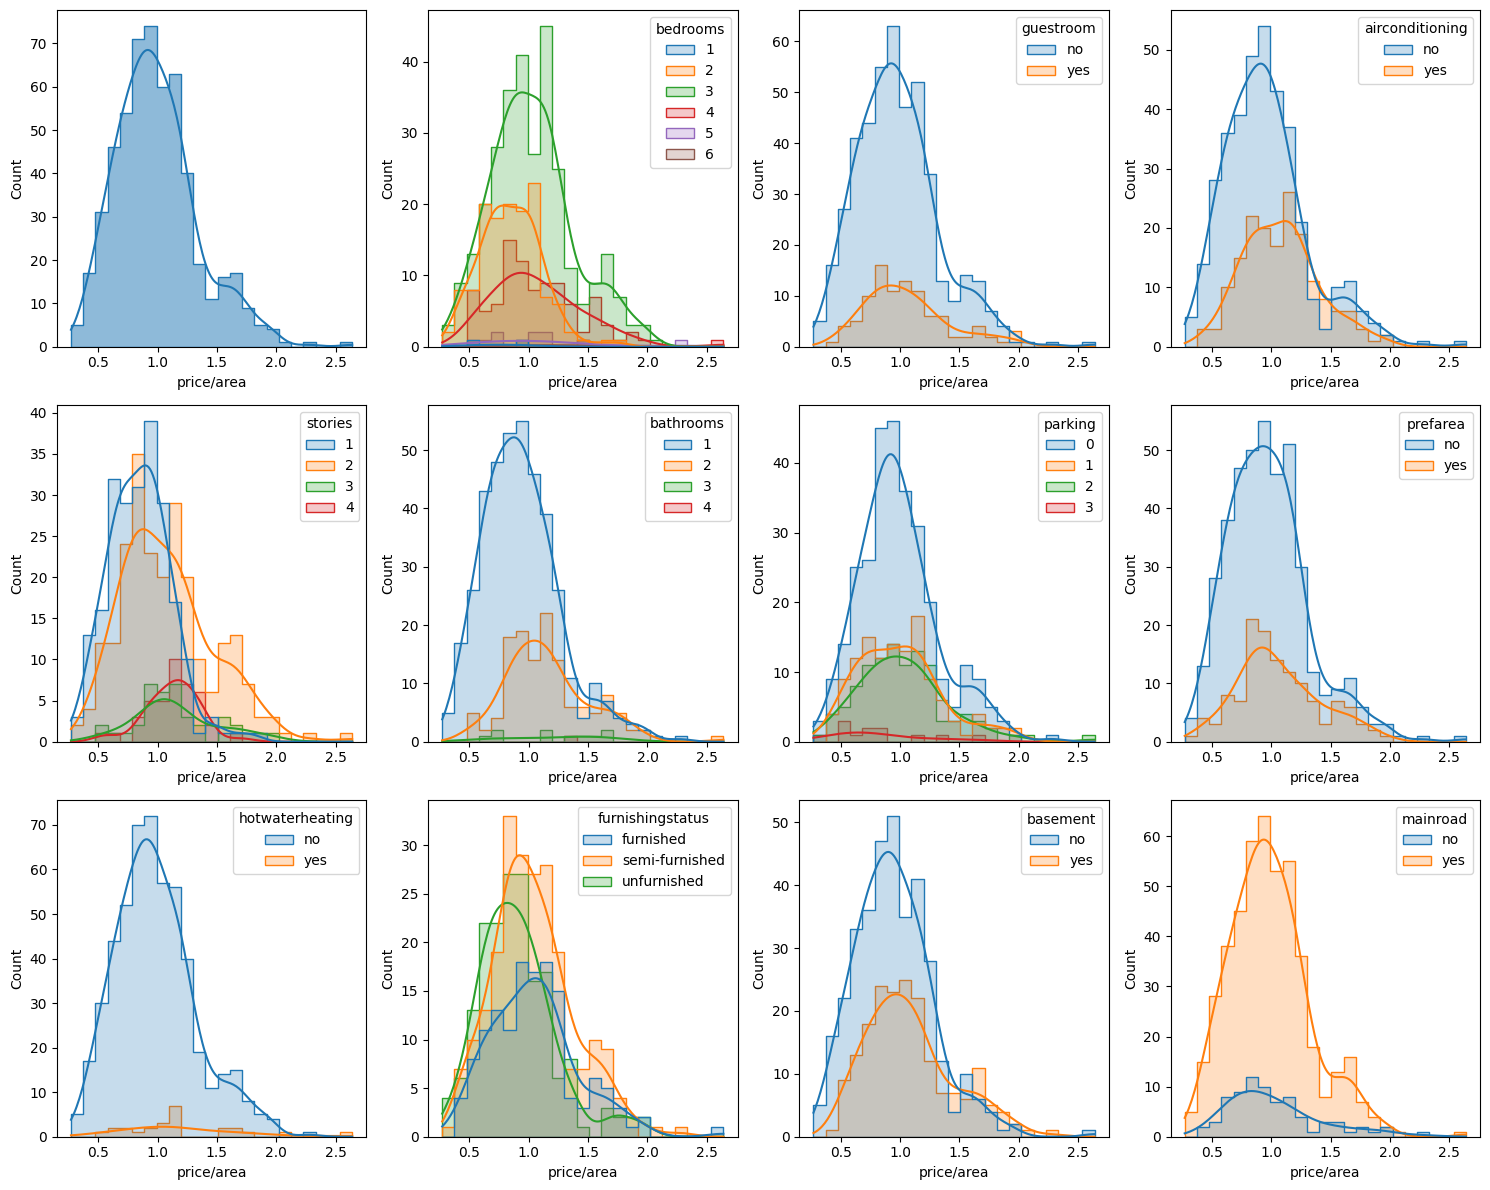

In [15]:
# Create a 3x4 grid of subplots with specified figure size
fig, axes = plt.subplots(3, 4, figsize=(15, 12))

# Plot a histogram of 'price/area' with step lines and a KDE (Kernel Density Estimate) on the first subplot
sns.histplot(df, x="price/area", ax=axes[0, 0], element="step", kde=True)

# Loop through the categorical columns and plot histograms with the hue for each categorical column
for ax, col in zip(axes.flat[1:], categorical_columns):
    sns.histplot(df, hue=col, x="price/area", ax=ax, fill=True, element="step", kde=True)

# Adjust the layout so the plots do not overlap
plt.tight_layout()


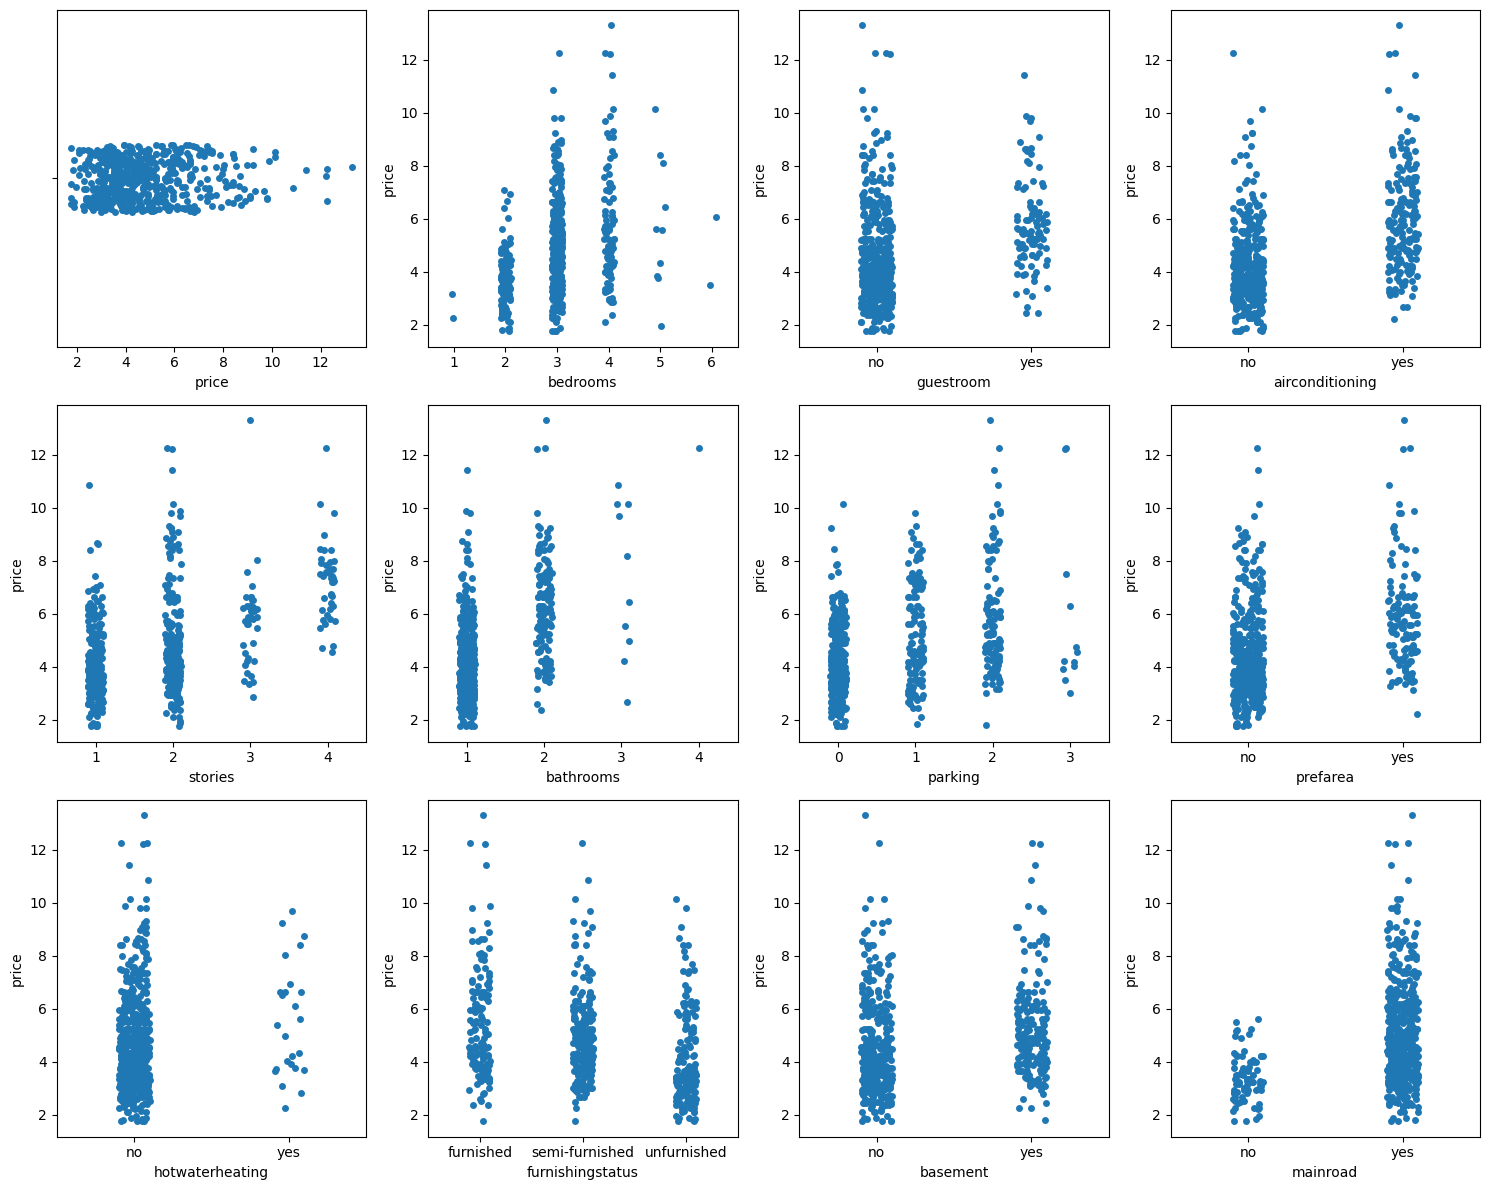

In [16]:
# Create a 3x4 grid of subplots with specified figure size
fig, axes = plt.subplots(3, 4, figsize=(15, 12))

# Plot a strip plot of 'price' on the first subplot
sns.stripplot(df, x="price", ax=axes[0, 0])

# Loop through the categorical columns and plot stripplots with 'price' on the y-axis
for ax, col in zip(axes.flat[1:], categorical_columns):
    sns.stripplot(df, x=col, y="price", ax=ax, dodge=1)

# Adjust the layout so the plots do not overlap
plt.tight_layout()


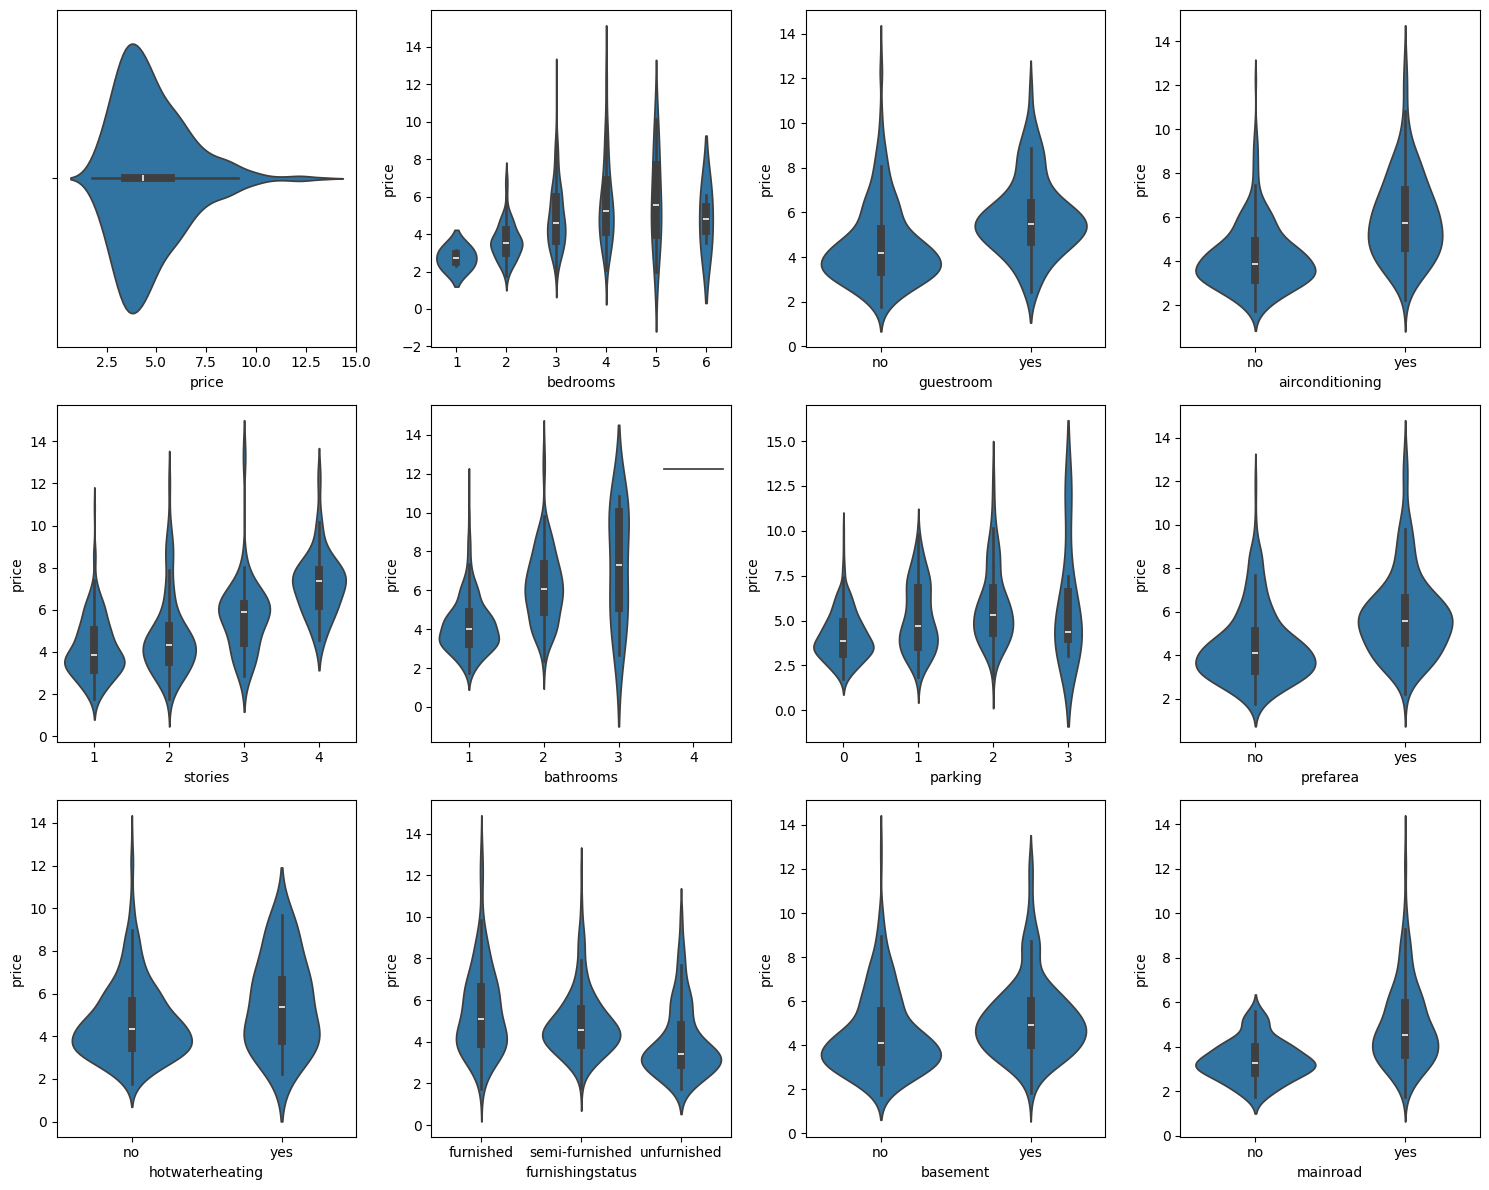

In [17]:
# Create a 3x4 grid of subplots with specified figure size
fig, axes = plt.subplots(3, 4, figsize=(15, 12))

# Plot a violin plot of 'price' on the first subplot
sns.violinplot(df, x="price", ax=axes[0, 0])

# Loop through the categorical columns and plot violin plots with 'price' on the y-axis
for ax, col in zip(axes.flat[1:], categorical_columns):
    sns.violinplot(df, x=col, y="price", ax=ax, dodge=1)

# Adjust the layout so the plots do not overlap
plt.tight_layout()


In [18]:
# Convert categorical columns to numerical codes
for col in categorical_columns:
    df[col] = df[col].cat.codes


<Axes: >

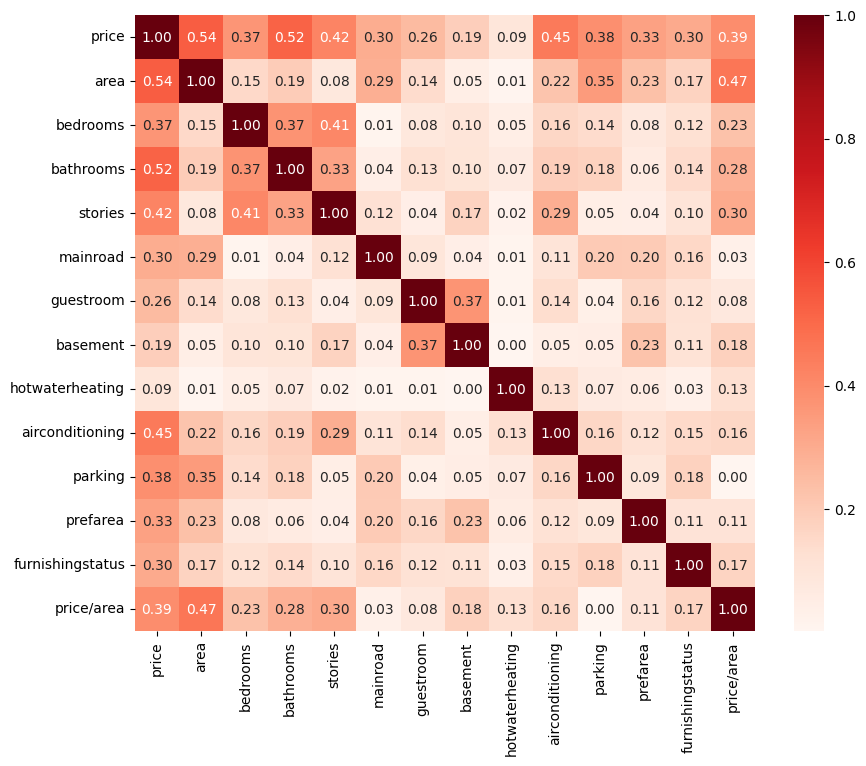

In [19]:
# Create a heatmap of the correlation matrix with absolute values
plt.figure(figsize=(10, 8))

# Plot the heatmap showing the correlations between numerical columns
sns.heatmap(abs(df.corr()), annot=True, fmt="0.2f", cmap="Reds")
